In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('ccdefault.csv')
df.drop(['ID'],axis=1,inplace=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [4]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [5]:
X = df.loc[:, features]
y = df.loc[:, ['DEFAULT']].values.ravel()

Part 1: Using ccdefault dataset, 10% test set holdout and 10 fold cross validation;

Fit a random forest model with several different values for N_estimators and report in-sample/out-of-sample accuracies

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.10,stratify=y,random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define different values for n_estimators
n_estimators = [10, 50, 100, 200, 500]

# Fit a random forest model for each value of n_estimators and calculate the in-sample and out-of-sample accuracies
for n in n_estimators:
    forest = RandomForestClassifier(criterion='gini',n_estimators=n, random_state=42)
    forest.fit(X_train, y_train)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    in_sample_acc = cross_val_score(forest, X_train, y_train, cv=cv).mean()
    out_of_sample_acc = cross_val_score(forest, X_test, y_test, cv=cv).mean()
    print(n,in_sample_acc,out_of_sample_acc)

10 0.8036296296296296 0.8009999999999999
50 0.8158518518518518 0.808
100 0.8166296296296297 0.8096666666666665
200 0.8172222222222223 0.8123333333333335
500 0.8175925925925925 0.8106666666666668


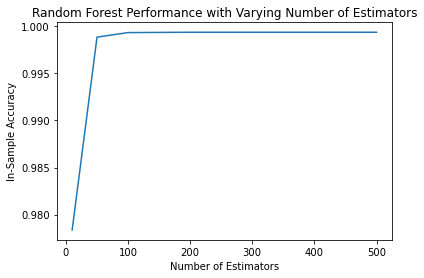

In [10]:
import matplotlib.pyplot as plt

n_estimators = [10, 50, 100, 200, 500]
in_sample_accs = []

for n in n_estimators:
    forest = RandomForestClassifier(n_estimators=n, random_state=42)
    forest.fit(X_train, y_train)
    in_sample_acc = forest.score(X_train, y_train)
    in_sample_accs.append(in_sample_acc)

plt.plot(n_estimators, in_sample_accs)
plt.xlabel("Number of Estimators")
plt.ylabel("In-Sample Accuracy")
plt.title("Random Forest Performance with Varying Number of Estimators")
plt.show()

Part 2: Random forest feature importance

Display the individual feature importance of your best model 

In [24]:
# Fit a random forest model with 500 estimators
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(X_train, y_train)

# Get feature importances
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            features[indices[f]], 
                            importances[indices[f]]))
    


 1) PAY_0                          0.096794
 2) AGE                            0.066689
 3) BILL_AMT1                      0.060587
 4) LIMIT_BAL                      0.060058
 5) BILL_AMT2                      0.054660
 6) BILL_AMT3                      0.051913
 7) PAY_AMT1                       0.051179
 8) BILL_AMT6                      0.050969
 9) BILL_AMT4                      0.050273
10) BILL_AMT5                      0.049742
11) PAY_AMT2                       0.047785
12) PAY_AMT3                       0.046092
13) PAY_AMT6                       0.045949
14) PAY_AMT5                       0.043606
15) PAY_AMT4                       0.043210
16) PAY_2                          0.043056
17) PAY_3                          0.027690
18) PAY_4                          0.022226
19) PAY_5                          0.020792
20) PAY_6                          0.020543
21) EDUCATION                      0.020408
22) MARRIAGE                       0.013642
23) SEX                         

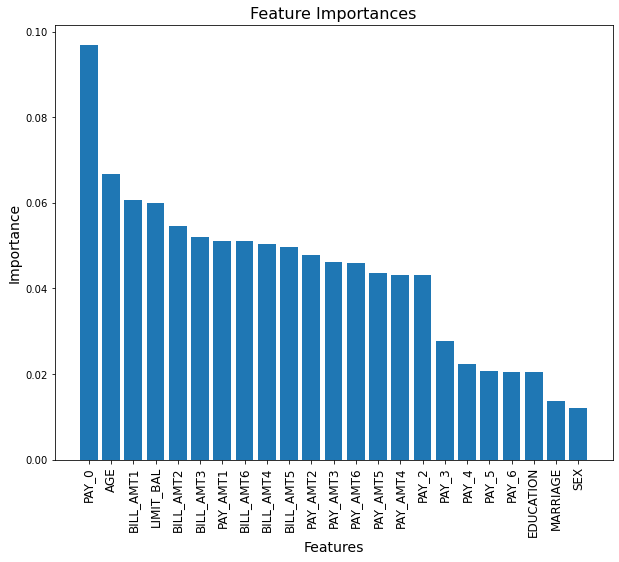

In [25]:
import matplotlib.pyplot as plt

# Plot the feature importances
plt.figure(figsize=(10,8))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), 
           [features[i] for i in indices], 
           rotation=90, fontsize=12)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.title('Feature Importances', fontsize=16)
plt.show()


Part 3: Conclusions
Write a short paragraph summarizing your findings. Answer the following questions:
a) What is the relationship between n_estimators, in-sample CV accuracy and computation time?
b) What is the optimal number of estimators for your forest?  
c) Which features contribute the most importance in your model according to scikit-learn 
function?  
d) What is feature importance and how is it calculated?  (If you are not sure, refer to the Scikit-
Learn.org documentation.)

-In sample cv-accuracy increases as the number of estimators increases. Although the computation time grows with the number, accuracy does as well.
-The optimal number of estimators for my forest 100 to prevent overfitting, according to the graph.
-The features that contribute the most importance in my model are PAY_0, AGE, and BILL_AMT1.
-Feature importance is a technique to determine the most importance features that contribute the most to a models output. It helps to know which features are the most important in making predictions. In Random Forests feature importance scores are based on the number of times a feature is used in the model's decision-making process.

In [13]:
print("My name is {Gabriel Regalado}")
print("My NetID is: {gregal2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Gabriel Regalado}
My NetID is: {gregal2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
